# Question 3

La vitesse maximale est de 19.54397394136808 km/h, atteinte à une cadence de 28 SPM.


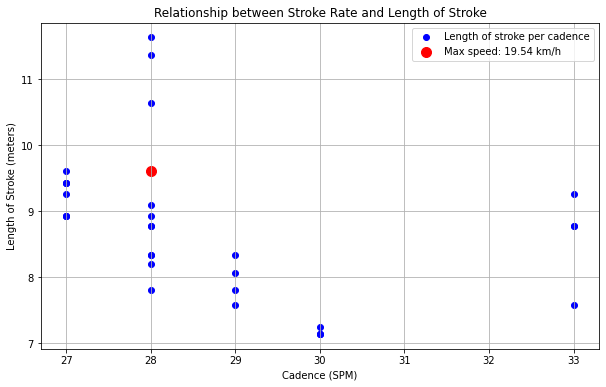

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("Test/ergometer_500m_norm.json")

distance = 0.5 # km


# Calcul de la longueur moyenne du coup (distance parcourue / nombre de coups)
df['stroke_length'] = (distance * 1000) / df['split_stroke_count']

# Calcul de la vitesse en km/h (distance en km / temps en heures)
df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = distance / df['split_time_hours']  # La distance est de 0.5 km (500m)

fastest_row = df.loc[df['speed_kmh'].idxmax()]

print(f"La vitesse maximale est de {fastest_row['speed_kmh']} km/h, atteinte à une cadence de {fastest_row['spm']} SPM.")



plt.figure(figsize=(10, 6))
plt.scatter(df['spm'], df['stroke_length'], color='blue', label='Length of stroke per cadence')

# point de cadence où la vitesse maximale est atteinte
plt.scatter(fastest_row['spm'], fastest_row['stroke_length'], color='red', s=100, label=f'Max speed: {fastest_row["speed_kmh"]:.2f} km/h')

plt.title('Relationship between Stroke Rate and Length of Stroke')
plt.xlabel('Cadence (SPM)')
plt.ylabel('Length of Stroke (meters)')
plt.grid(True)
plt.legend()

# Affichage du graphique
plt.show()
